**SMS Spam Classifier**


1.   Data Cleaning
2.   EDA
3.   Text Preprocessing
2.   Vectorizing
3.   Model Training





In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import string
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data fetching


In [ ]:
spam_clas = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
spam_clas.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
spam_clas.shape

(5572, 5)

Data Cleaning

In [ ]:
# Removing unwanted data
spam_clas.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [ ]:
spam_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam_clas.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Changing Column Names for bbetter understanding
spam_clas.rename(columns={"v1":"target","v2":"SMS_Text"},inplace = True)
spam_clas.sample(5)

,target,SMS_Text
5054,ham,Am on a train back from northampton so i'm afr...
2767,ham,Wow v v impressed. Have funs shopping!
3156,ham,Havent shopping now lor i juz arrive only
5257,ham,"As usual..iam fine, happy &amp; doing well..:)"
5216,ham,I am late. I will be there at


In [ ]:
#Label Encoding
label_encode = LabelEncoder()

In [ ]:
# transforming
spam_clas['target'] = label_encode.fit_transform(spam_clas['target'])
spam_clas.head()

,target,SMS_Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Searching for Null Values
spam_clas.isnull().sum()

target      0
SMS_Text    0
dtype: int64

In [ ]:
# Duplicated Values
spam_clas.duplicated().sum()

403

In [ ]:
# Removing Duplicated values
spam_clas = spam_clas.drop_duplicates(keep ="first")

In [ ]:
# Duplicated Values
spam_clas.duplicated().sum()

0

In [ ]:
spam_clas.shape

(5169, 2)

Exploratory Data Analysis

In [ ]:
spam_clas.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
spam_clas["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

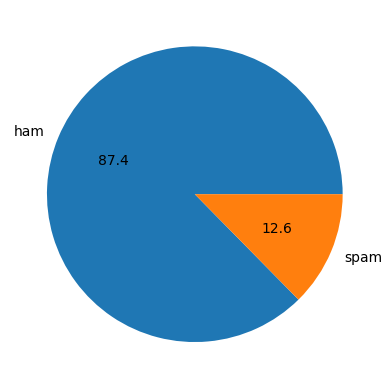

In [ ]:
# Pie chart for Ham and Spma
plt.pie(spam_clas["target"].value_counts(), labels = ['ham','spam'],autopct="%0.1f")
plt.show()

In [ ]:
# Data is imbalanced

Text Preprocessing

In [ ]:
# Number of charcaters
spam_clas["num of characters"] = spam_clas["SMS_Text"].apply(len)
spam_clas.head()

,target,SMS_Text,num of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Number of words
spam_clas["num of words"] = spam_clas["SMS_Text"].apply(lambda x : len(nltk.word_tokenize(x)))
spam_clas.head()

,target,SMS_Text,num of characters,num of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Number of sentences
spam_clas["num of sentences"] = spam_clas["SMS_Text"].apply(lambda x : len(nltk.sent_tokenize(x)))
spam_clas.head()

,target,SMS_Text,num of characters,num of words,num of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Description of Spam Data set
spam_clas[["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
  # Ham Messages
spam_clas[spam_clas['target']==0][["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
  # Spam Messages
spam_clas[spam_clas['target']==1][["num of characters","num of words","num of sentences"]].describe()

,num of characters,num of words,num of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0, 0.5, 'num of Characters')

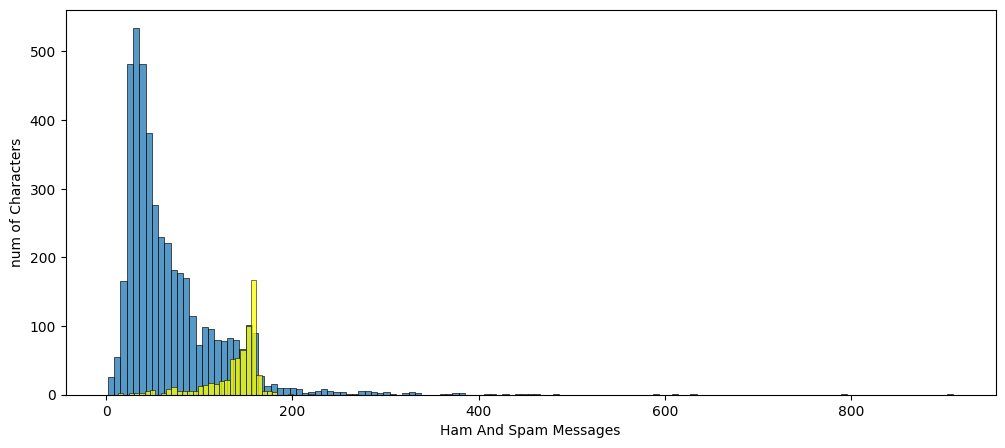

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(spam_clas[spam_clas["target"]==0]["num of characters"])
sns.histplot(spam_clas[spam_clas["target"]==1]["num of characters"],color = "yellow")
plt.xlabel('Ham And Spam Messages')
plt.ylabel('num of Characters')

<ipython-input-26-7547019c7fbc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_clas.corr(),annot=True)


<Axes: >

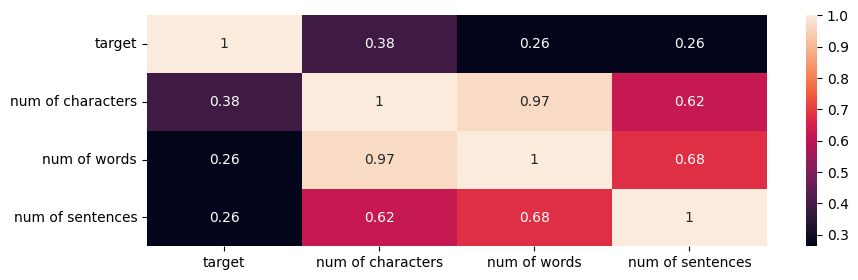

In [ ]:
#  HeatMap for checking the correlation of text
plt.figure(figsize=(10,3))
sns.heatmap(spam_clas.corr(),annot=True)

## Data Preprocessing

*   lower case

*   Tokenization
* Removing special character
* Removing stopwords and punctuation
* stemming



In [ ]:
# Creating an bject of Porter Stemmer
ps = PorterStemmer()

In [ ]:
# Creating a function for Tranforming of text
def transform_text(Input_text):
  #lower case
  Input_text.lower()

  #tokenization
  Input_text = nltk.word_tokenize(Input_text)

  #special character
  temp = []
  for i in Input_text:
    if i.isalnum():
      temp.append(i)
  Input_text = temp[:]
  temp.clear()
  #stop words
  for i in Input_text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      temp.append(i)
  Input_text = temp[:]
  temp.clear()
  # Stemming
  for i in Input_text:
    temp.append(ps.stem(i))
  Input_text = temp[:]

  return " ".join(Input_text)

In [ ]:
# Transforming your sms description
spam_clas["transformed"] = spam_clas["SMS_Text"].apply(transform_text)

In [ ]:
spam_clas.head()

,target,SMS_Text,num of characters,num of words,num of sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [ ]:
# word cloud format
!pip install wordcloud

In [ ]:
# Importing Wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

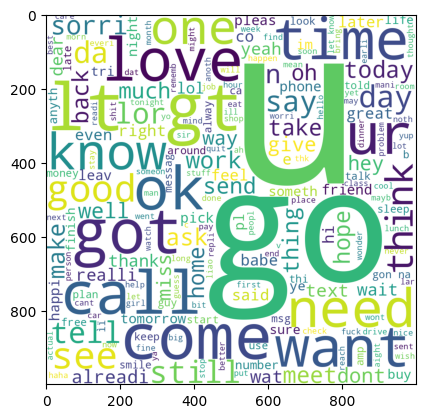

In [ ]:
ham_wc = wc.generate(spam_clas[spam_clas["target"]==0]["transformed"].str.cat(sep=" "))
plt.imshow(ham_wc)

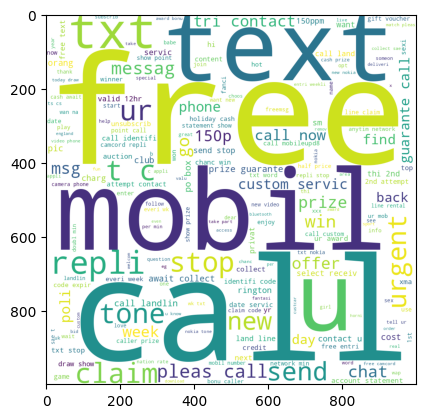

In [ ]:
spam_wc = wc.generate(spam_clas[spam_clas["target"]==1]["transformed"].str.cat(sep=" "))
plt.imshow(spam_wc)

## Model Building

In [ ]:
# Naive Baye's give good results on textual data
# Vectorization : Here I am using Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features = 3000)

In [ ]:
X_data = tf_idf.fit_transform(spam_clas["transformed"]).toarray()

In [ ]:
X_data.shape

(5169, 3000)

In [ ]:
y_data = spam_clas["target"].values
y_data

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Splitting Training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X_data,y_data,test_size = 0.2, random_state=2)

In [ ]:
print(X_train.shape)
X_test.shape

(4135, 3000)


(1034, 3000)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
svc = SVC(kernel = 'sigmoid',gamma=1)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
classification = {
    "SVC": svc,
    "GNB": gnb,
    "MN-NB": mnb,
    "BNB": bnb,
    "LR": lrc,
}

In [ ]:
def train_classifier(classification,X_train,Y_train,X_test,Y_test):
  classification.fit(X_train,Y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)
  return accuracy, precision

In [ ]:
score_accuracy = []
score_prec = []
for name,clf in classification.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)

  print("For ",name)
  print("accuracy",current_accuracy)
  print("Precision",current_precision)

  score_accuracy.append(current_accuracy)
  score_prec.append(current_precision)


For  SVC
accuracy 0.9787234042553191
Precision 0.9915254237288136
For  GNB
accuracy 0.874274661508704
Precision 0.5190476190476191
For  MN-NB
accuracy 0.9748549323017408
Precision 1.0
For  BNB
accuracy 0.9845261121856866
Precision 0.9919354838709677
For  LR
accuracy 0.9555125725338491
Precision 0.96


In [ ]:
performance_df = pd.DataFrame({'Algorithms':classification.keys(),'Accuracy':score_accuracy,'Precision':score_prec}).sort_values('Precision',ascending =False)
performance_df

,Algorithms,Accuracy,Precision
2,MN-NB,0.974855,1.000000
3,BNB,0.984526,0.991935
0,SVC,0.978723,0.991525
4,LR,0.955513,0.960000
1,GNB,0.874275,0.519048


In [ ]:
# Since Multinomial Naive Baye's is giving Good results so we can use this model
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


## Evaluating the Model

In [ ]:

# new_text ="Congratulations! You've won a free vacation to a tropical paradise. Reply 'YES' to claim your prize now!"
# new_text ="URGENT: Your account has been compromised. Click the link to reset your password and secure your account."
# new_text ="LIMITED TIME OFFER: Get 50% off all products today only! Visit our website and use code 'SALE50' at checkout."

new_text = "Hi Ali, i have met susan and she was asking about you"
# new_text ="Hey! Just checking in to see if you're available for a call later this week. Let me know your schedule."
# new_text ="Hi Mom, just wanted to let you know that I arrived safely at my destination. Will keep in touch during my trip."

#transform
SMS_transform = transform_text(new_text)
#vectorize
vector_input = tf_idf.transform([SMS_transform])
# Model Prediction
predicted_result = mnb.predict(vector_input)[0]
# Display of Results
if predicted_result==1:
  print("Spam")
else:
  print("Not Spam")

Not Spam


Project End